In [15]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn import datasets

# 현재, cross_validation 메소드가 model_selection 라이브러리로 옮겨졌다. 
# 그래서 아래의 줄이 아닌, model_selection 을 import 해야한다.
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 표준화 적용
standardised = True

M = {0:"꽃받침의 폭", 1:"꽃받침의 길이", 2:"꽃잎의 길이", 3:"꽃잎의 폭"}

#Choose two features
x=1 #1 corresponds to the sepal width
y=3 #3 corresponds to the petal width

iris = datasets.load_iris()
data = iris.data[:,[x,y]]

labels = iris.target

In [25]:
# 준비단계 (1-1-ML-ex2.py)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5, random_state=1)

reg = StandardScaler()
reg.fit(data)
X_train_std = reg.transform(X_train)
X_test_std = reg.transform(X_test)

if (standardised == False):
  X_train_std = X_train
  X_test_std = X_test


mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100,)) # 책 32쪽 참조 
mlp.fit(X_train_std, y_train)

y_pred = mlp.predict(X_test_std)
print('잘못 분류된 예시들: %d' % (y_test != y_pred).sum())

print('정확도: %.2f' % accuracy_score(y_test, y_pred))


잘못 분류된 예시들: 6
정확도: 0.92


/Users/mac88/code/.virtualenvs/deeplearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


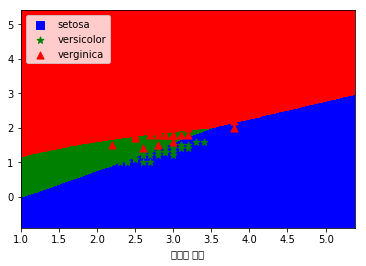

In [26]:
# 2차원 이미지로 표현하기
markers = ('s', '*', '^')
colors = ('blue', 'green', 'red')
cmap = ListedColormap(colors)

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 0].max() + 1
resolution = 0.01

x, y = numpy.meshgrid(numpy.arange(x_min, x_max, resolution), numpy.arange(y_min, y_max, resolution)) 
z = mlp.predict(numpy.array([x.ravel(), y.ravel()]).T)
z = z.reshape(x.shape)

plt.pcolormesh(x, y, z, cmap=cmap)
plt.xlim(x.min(), x.max())

plt.ylim(y.min(), y.max())
# 데이터 시각화하기
classes = ["setosa", "versicolor", "verginica"]
for index, cl in enumerate(numpy.unique(labels)):
    plt.scatter(data[labels == cl, 0], data[labels == cl, 1],
               c=cmap(index), marker=markers[index], s=50, label=classes[index])
plt.xlabel('꽃잎 갈이')
plt.xlabel('꽃받침 갈이')
plt.legend(loc='upper left')
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TypeError: unhashable type: 'numpy.ndarray'

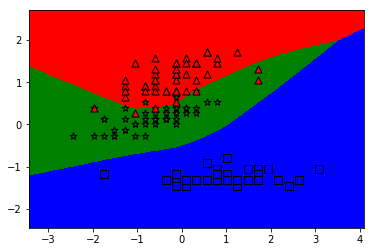

In [27]:
# 함수로 바꾸고, 조금 더 디벨롭 해보자. (파이썬 딥러닝 깃헙코드)

# mlp = MLPClassifier(random_state=1, max_iter=1000) # 책과 다름(주석을 풀고 추가해서 해보세요.)
def plot_decision_regions(data, labels, classifier, resolution=0.01):
    markers = ('s', '*', '^')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors)
    # plot the decision surface
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    x, y = numpy.meshgrid(numpy.arange(x_min, x_max, resolution), numpy.arange(y_min, y_max, resolution))
    Z = classifier.predict(numpy.array([x.ravel(), y.ravel()]).T)
    Z = Z.reshape(x.shape)
    
    plt.pcolormesh(x, y, Z, cmap=cmap)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())

    colors = ('yellow', 'white', 'black')
    #cmap = ListedColormap(colors)
    #plot the data
    classes = ["setosa", "versicolor", "verginica"]
    for index, cl in enumerate(numpy.unique(labels)):
        plt.scatter(data[labels == cl, 0], data[labels == cl, 1], c=cmap(index), marker=markers[index], edgecolor="black", alpha=1.0, s=50, label=classes[index])  
 
X_combined_std = numpy.vstack((X_train_std, X_test_std))
y_combined = numpy.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=mlp)

if (standardised == False):
  xString = M[x] + " [not standardized]"  
  yString = M[y] + " [not standardized]" 
else:
  xString = M[x] + " [standardized]"  
  yString = M[y] + " [standardized]"  

plt.xlabel(xString)
plt.ylabel(yString)
plt.legend(loc='upper left')
plt.show()